In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [3]:
data=pd.read_excel('./use.xlsx')
train_data,test_data=train_test_split(data,test_size=0.2, 
                                      random_state=1106
                                      )
feature=train_data.drop(['Y','Unnamed: 0'],axis=1)
label=train_data['Y']

In [4]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [20]:
def RFR_cv(n_estimators, min_samples_split, max_depth):
    val = cross_val_score(
        RandomForestRegressor(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_depth=int(max_depth),
            random_state=1314
        ),
        feature, label, scoring='r2', cv=kfold
    ).mean()
    return val

In [11]:
RFR_opt = BayesianOptimization(
        RFR_cv,
        {'n_estimators': (50, 1000),
        'min_samples_split': (2, 25),
        'max_depth': (2, 15)}
    )

In [12]:
RFR_opt.maximize(n_iter=50)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.245     | 3.948     | 15.78     | 224.4     |
| 2         | 0.5997    | 9.043     | 8.465     | 321.5     |
| 3         | 0.4542    | 6.285     | 16.04     | 232.1     |
| 4         | 0.5266    | 9.294     | 24.38     | 966.7     |
| 5         | 0.1393    | 2.918     | 22.36     | 371.7     |
| 6         | 0.5997    | 9.479     | 8.385     | 322.9     |
| 7         | 0.5682    | 12.71     | 21.76     | 321.7     |
| 8         | 0.5351    | 8.793     | 17.13     | 251.8     |
| 9         | 0.6377    | 14.78     | 10.57     | 300.5     |
| 10        | 0.3201    | 4.065     | 23.74     | 297.7     |
| 11        | 0.6822    | 15.0      | 2.0       | 291.7     |
| 12        | 0.6668    | 12.06     | 3.785     | 274.8     |
| 13        | 0.1385    | 2.0       | 2.0       | 284.9     |
| 14        | 0.6761    | 13.86     | 2.125     | 301.4     |
| 15    

In [13]:
RFR_opt.max

{'target': 0.6821545926030548,
 'params': {'max_depth': 15.0,
  'min_samples_split': 2.0,
  'n_estimators': 291.7475353029775}}

In [5]:
model = RandomForestRegressor(n_estimators=1000,
                              max_depth=23,
                            #   min_samples_split= 3,
                              n_jobs=-1,
                              random_state=1314).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.7322136262072454
rmse: 0.07862505894774263


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_x = test_data.drop(['Y','Unnamed: 0'],axis=1)
test_y = test_data['Y']
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',pow(mean_squared_error(label,model.predict(feature)),0.5))
print('测试集得分为：', r2_score(test_y,model.predict(test_x)),pow(mean_squared_error(test_y,model.predict(test_x)),0.5))

r2: 0.9628932229005674
MAE: 0.029128846494054523
测试集得分为： 0.7422251515397189 0.07289798399260503


In [7]:
# 预测
Y1=model.predict(X=test_data.drop(['Y','Unnamed: 0'],axis=1))
Y2=test_data['Y']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)
pred_show

,Y_pred,Y_True
355,0.143723,0.141050
51,0.223143,0.080100
243,0.132347,0.123750
426,0.288763,0.329000
161,0.279455,0.317688
...,...,...
57,0.134745,0.160650
110,0.263226,0.248400
146,0.177092,0.061600
291,0.158031,0.176000


In [8]:
# 预测2
Y_1=model.predict(feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

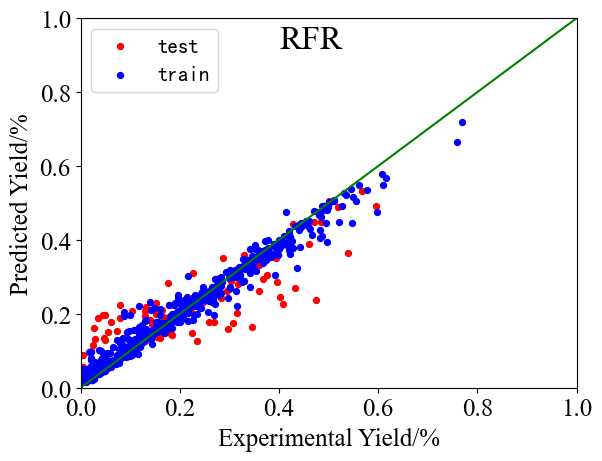

In [9]:
# 模型预测性能制图
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=18,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=18,label='train')
plt.xlim((0,1))
plt.xlabel('Experimental Yield/%',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=18,fontname='Times New Roman')
plt.ylim((0,1))
plt.ylabel('Predicted Yield/%',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=18,fontname='Times New Roman')
plt.plot([0,1],[0,1],color='g')
plt.text(0.4,0.92,'RFR',fontsize=24,font=Path('..\TimesNewRoman.ttf'))
plt.legend(fontsize=15)
plt.show()